In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Load the dataset
data = pd.read_csv('Final_data.csv')


# Select features - this is where you can get creative based on your data
# For demonstration, let's use a few basic features
features = data[['Monthly SKUs Purchased', 'Monthly Vendors Purchased', 'Monthly Number of Sales', 'Monthly Sum Sales ($)', 'Monthly Gross Margin ($)']]

# Target variable
target = data['Churned']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [2]:
# Create the decision tree classifier
tree_model = DecisionTreeClassifier()

# Train the model
tree_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [3]:
# Make predictions on the test set
predictions = tree_model.predict(X_test)

# Print classification report and confusion matrix
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     40178
           1       0.04      0.04      0.04       542

    accuracy                           0.97     40720
   macro avg       0.51      0.51      0.51     40720
weighted avg       0.97      0.97      0.97     40720

[[39628   550]
 [  519    23]]


In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

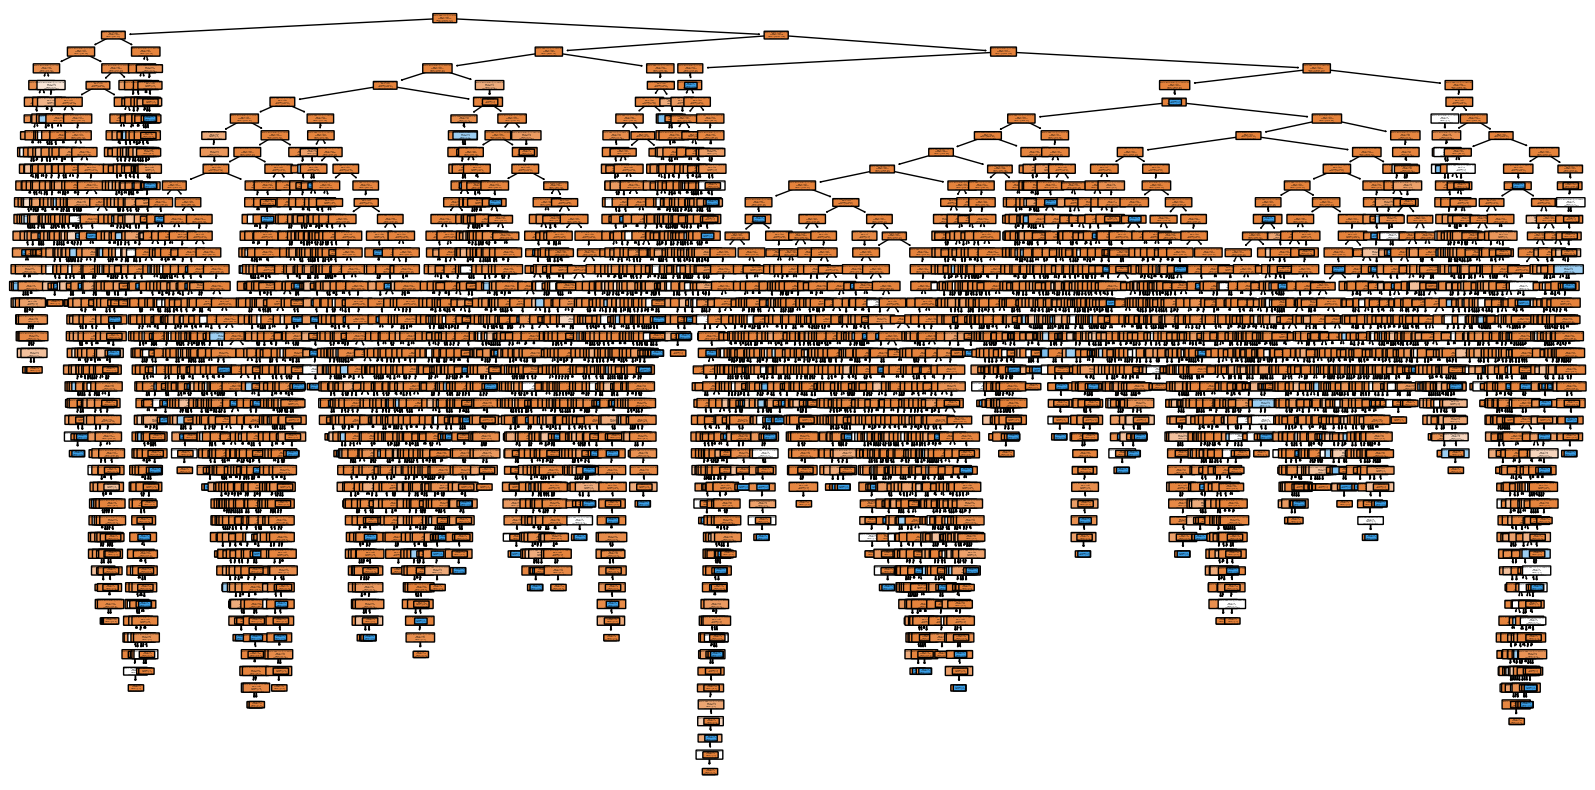

In [5]:
# Visualizing the tree
plt.figure(figsize=(20,10))
plot_tree(tree_model, filled=True, feature_names=features.columns, class_names=['Not Churned', 'Churned'], rounded=True)
plt.show()

# Check for Overfitting

In [6]:
from sklearn.metrics import accuracy_score

# Create an array to store what the tree would predict
y_train_predicted = tree_model.predict(X_train)

# Calculate the accuracy using accuracy_score (imported function in first cell)
accuracy_score(y_train, y_train_predicted)

0.9994044549227633

In [7]:
# Create an array to store what the tree would predict
y_test_predicted = tree_model.predict(X_test)

# Calculate the accuracy using accuracy_score (imported function in first cell)
accuracy_score(y_test, y_test_predicted)

0.9737475442043222

# Pre-Pruning: Limit the Tree Depth


In [8]:
# Fit a classification tree with limited depth using max_depth
ct = DecisionTreeClassifier(criterion='entropy',random_state=0, max_depth=20)
ct.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=20, random_state=0)

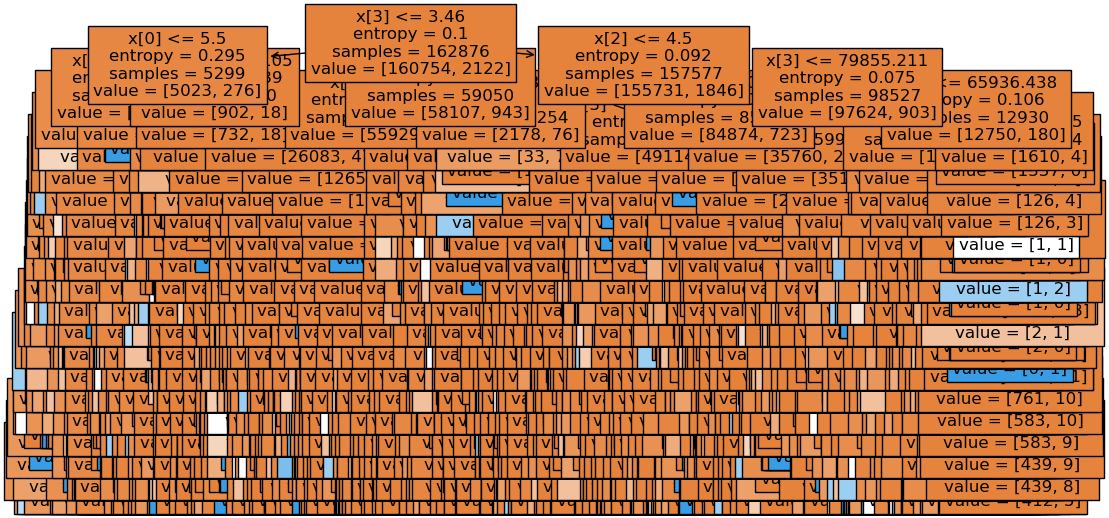

In [9]:
# Plot the tree
# We are using some formatting for readability
plt.figure(figsize=(12,6))
plot_tree(ct, fontsize=12, filled=True)
plt.show()

In [10]:
# How can I check which category is which?
# Look at the overall counts for the target variable in the first node.
y_train.value_counts()

0    160754
1      2122
Name: Churned, dtype: int64

In [16]:
# QUICK CONCEPT REVIEW:
# What is the information gain from the first split?
# parent entropy - ((fraction in child1)*entropy of child1 + (fraction in child2)*entropy of child2)
1 - ((5299/162876)*0.295 + (155731/162876)*0.092)

0.9024383150372062

In [17]:
# Let's use a for-loop to see the accuracy for different tree depths
import numpy as np
# Use np.arange to create an array
v = np.arange(200)
print(v)

# Increment the array up by 1 for our purposes (need to start at 1)
v=v+1
print(v)

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199]
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46 

In [18]:
# Create the for-loop

# Initialize an array of 0's to store the accuracy
acc_train = np.zeros(200)
acc_test = np.zeros(200)

# Use i to denote the max_depth for each iteration
for i in v:
    ct = DecisionTreeClassifier(criterion='entropy',random_state=0, max_depth=i)
    ct.fit(X_train,y_train)
    y_train_pred = ct.predict(X_train)
    y_test_pred = ct.predict(X_test)
    acc_train[i-1]=accuracy_score(y_train, y_train_pred)
    acc_test[i-1]=accuracy_score(y_test, y_test_pred)
    print('Testing Accuracy with {} variables is {}'.format(i, accuracy_score(y_test, y_test_pred)))

Testing Accuracy with 1 variables is 0.9866895874263262
Testing Accuracy with 2 variables is 0.9866895874263262
Testing Accuracy with 3 variables is 0.9866895874263262
Testing Accuracy with 4 variables is 0.9866895874263262
Testing Accuracy with 5 variables is 0.9866895874263262
Testing Accuracy with 6 variables is 0.9866404715127701
Testing Accuracy with 7 variables is 0.9864931237721022
Testing Accuracy with 8 variables is 0.9864440078585461
Testing Accuracy with 9 variables is 0.9863212180746562
Testing Accuracy with 10 variables is 0.9861493123772103
Testing Accuracy with 11 variables is 0.9860019646365422
Testing Accuracy with 12 variables is 0.9857809430255403
Testing Accuracy with 13 variables is 0.9852406679764244
Testing Accuracy with 14 variables is 0.9849459724950884
Testing Accuracy with 15 variables is 0.9843811394891945
Testing Accuracy with 16 variables is 0.9840864440078585
Testing Accuracy with 17 variables is 0.9837426326129666
Testing Accuracy with 18 variables is 0.

Testing Accuracy with 145 variables is 0.9738212180746562
Testing Accuracy with 146 variables is 0.9738212180746562
Testing Accuracy with 147 variables is 0.9738212180746562
Testing Accuracy with 148 variables is 0.9738212180746562
Testing Accuracy with 149 variables is 0.9738212180746562
Testing Accuracy with 150 variables is 0.9738212180746562
Testing Accuracy with 151 variables is 0.9738212180746562
Testing Accuracy with 152 variables is 0.9738212180746562
Testing Accuracy with 153 variables is 0.9738212180746562
Testing Accuracy with 154 variables is 0.9738212180746562
Testing Accuracy with 155 variables is 0.9738212180746562
Testing Accuracy with 156 variables is 0.9738212180746562
Testing Accuracy with 157 variables is 0.9738212180746562
Testing Accuracy with 158 variables is 0.9738212180746562
Testing Accuracy with 159 variables is 0.9738212180746562
Testing Accuracy with 160 variables is 0.9738212180746562
Testing Accuracy with 161 variables is 0.9738212180746562
Testing Accura

<function matplotlib.pyplot.show(close=None, block=None)>

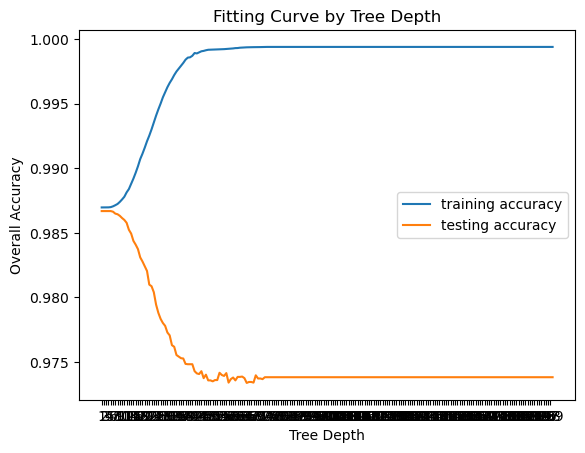

In [19]:
# Plot the number of splits by the accuracy for both training and testing data
# Add two series to the plot using plt.plot(x1, y1, x2, y2)
plt.plot(v,acc_train, label='training accuracy')
plt.plot(v,acc_test, label='testing accuracy')
plt.legend()

# Force the x-axis to be integers
plt.xticks(range(1,200))

# Add title, axis labels
plt.title("Fitting Curve by Tree Depth")
plt.xlabel("Tree Depth")
plt.ylabel("Overall Accuracy")

plt.show

In [20]:
# Find the tree_depth at the maximum testing accuracy

# Find the max accuracy of the test data
m = np.max(acc_test)
print(m)

0.9866895874263262


In [ ]:
# Using pandas
# Must convert np.arrays to Series

# Find the index of the max m
s_acc_test = pd.Series(acc_test)
s_v = pd.Series(v)

# pandas has a built-in function to return the index of the max of a series, Series.idxmax()
index_m = s_acc_test.idxmax()

# Print the value from the tree depth series with that index
print(s_v[index_m])

In [ ]:
# Fit a classification tree with limited depth using max_depth
ct = DecisionTreeClassifier(criterion='entropy',random_state=0, min_samples_leaf=5)
ct.fit(X_train,y_train)

In [ ]:
# Plot the tree
# We are using some formatting for readability
plt.figure(figsize=(12,6))
plot_tree(ct, fontsize=12, filled=True)
plt.show()

In [ ]:
# How can I check which category is which?
# Look at the overall counts for the target variable in the first node.
y_train.value_counts()

In [ ]:
# Let's use a for-loop to see the accuracy for different tree depths

# Use np.arange to create an array
v = np.arange(200)
print(v)

# Increment the array up by 1 for our purposes (need to start at 1)
v=v+1
print(v)

In [ ]:
# Create the for-loop

# Initialize an array of 0's to store the accuracy
acc_train = np.zeros(200)
acc_test = np.zeros(200)

# Use i to denote the max_depth for each iteration
for i in v:
    ct = DecisionTreeClassifier(criterion='entropy',random_state=0, max_depth=i)
    ct.fit(X_train,y_train)
    y_train_pred = ct.predict(X_train)
    y_test_pred = ct.predict(X_test)
    acc_train[i-1]=accuracy_score(y_train, y_train_pred)
    acc_test[i-1]=accuracy_score(y_test, y_test_pred)
    print('Testing Accuracy with {} variables is {}'.format(i, accuracy_score(y_test, y_test_pred)))

In [ ]:
# Plot the number of splits by the accuracy for both training and testing data
# Add two series to the plot using plt.plot(x1, y1, x2, y2)
plt.plot(v,acc_train, label='training accuracy')
plt.plot(v,acc_test, label='testing accuracy')
plt.legend()

# Force the x-axis to be integers
plt.xticks(range(1,200))

# Add title, axis labels
plt.title("Fitting Curve by Tree Depth")
plt.xlabel("Tree Depth")
plt.ylabel("Overall Accuracy")

plt.show

In [ ]:
#Find the tree_depth at the maximum testing accuracy

# Find the max accuracy of the test data
m = np.max(acc_test)
print(m)

In [ ]:
# Using numpy arrays
# Use np.where() to find the location
index_m = np.where(acc_test==m)[0]

# Print the corresponding value from v, tree depth
print(v[index_m])

In [ ]:
# Using pandas
# Must convert np.arrays to Series

# Find the index of the max m
s_acc_test = pd.Series(acc_test)
s_v = pd.Series(v)

# pandas has a built-in function to return the index of the max of a series, Series.idxmax()
index_m = s_acc_test.idxmax()

# Print the value from the tree depth series with that index
print(s_v[index_m])